In [1]:
import os
import colorsys
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def print_image(img, name):
    fig, axes = plt.subplots(1)

    axes.imshow(img, cmap="gray")
    axes.set_title(name)
    axes.axis("off")

    fig.set_figwidth(5)
    fig.set_figheight(5)

    plt.show()

In [3]:
def print_chart(img_arr, text):
    x = [i for i in range(0, 256)]
    y = np.zeros(256, dtype=int)
    y1 = np.zeros(256, dtype=int)
    y2 = np.zeros(256, dtype=int)
    y3 = np.zeros(256, dtype=int)
    plt.figure(figsize=[5, 3])

    if len(img_arr.shape) > 2:
      for i in img_arr[:, :, 0].flat:
        y[i] += 1
      for i in img_arr[:, :, 1].flat:
        y1[i] += 1
      for i in img_arr[:, :, 2].flat:
        y2[i] += 1
      for i in img_arr.flat:
        y3[i] += 1
      plt.bar(x, y)
      plt.bar(x, y1)
      plt.bar(x, y2)

    else:
      for i in img_arr.flat:
        y3[i] += 1
      plt.bar(x, y3)

    plt.title(text)
    plt.ylabel("Кол-во пикселей")
    plt.xlabel("Уровень яркости")
    plt.xlim([-1, 256])
    plt.show()


In [4]:
def log_p(img):
    c = int(255 / (np.log1p(1 + np.max(img))))

    for i in range(img.shape[0]):

        for j in range(img.shape[1]):

            for p in range(len(img[i][j])):
                img[i][j][p] = c * np.log1p(1 + img[i][j][p])

In [5]:

def deg(img, pow, c = 1):

    for i in range(img.shape[0]):

        for j in range(img.shape[1]):

            for p in range(len(img[i][j])):
                img[i][j][p] = 255 * (img[i][j][p] / 255) **pow

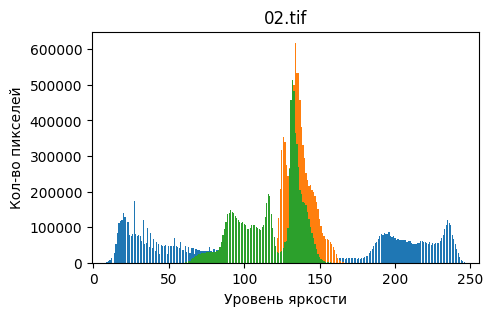

-100-255


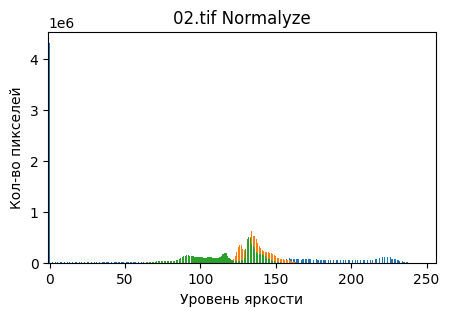

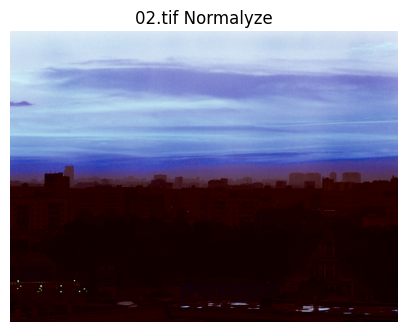

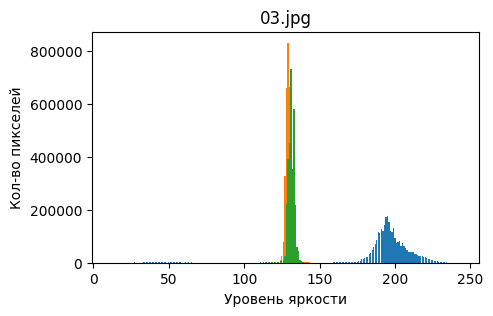

-100-255


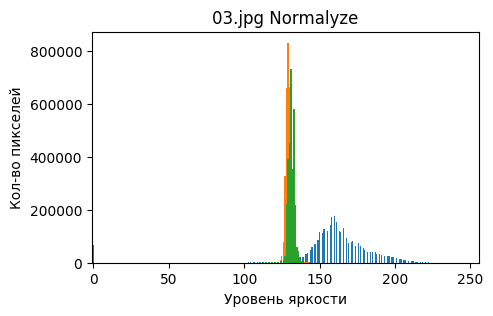

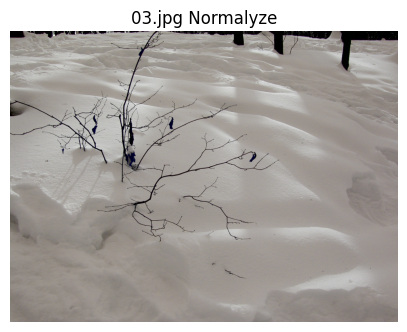

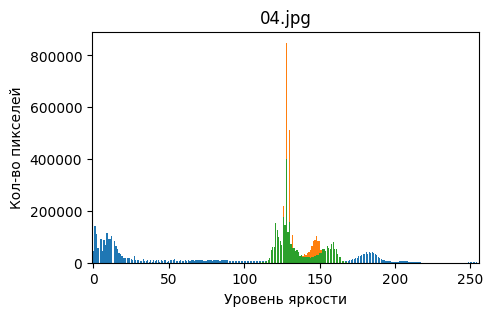

0-300


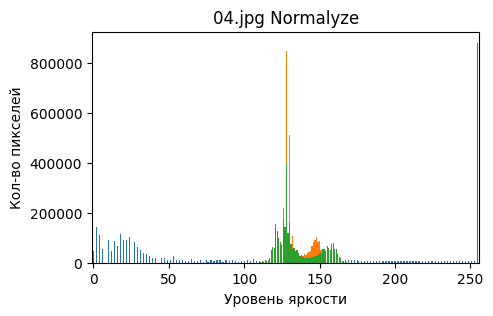

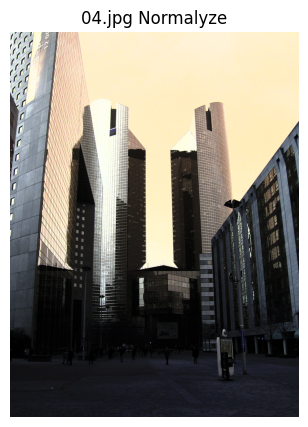

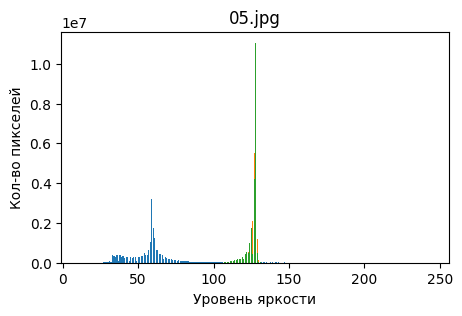

0-300


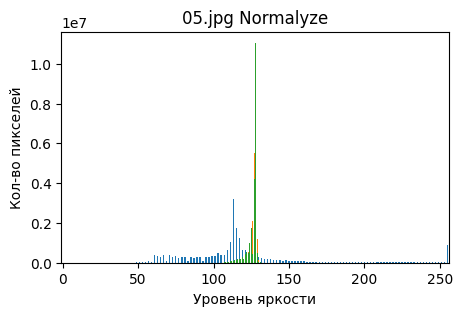

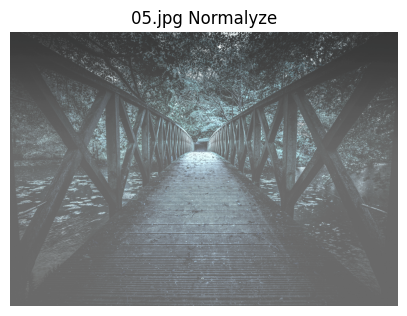

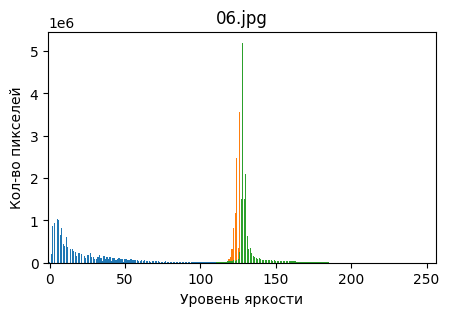

0-300


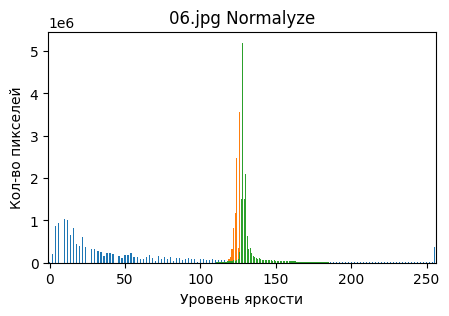

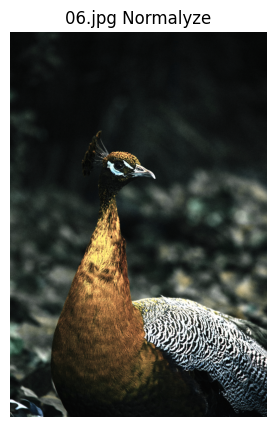

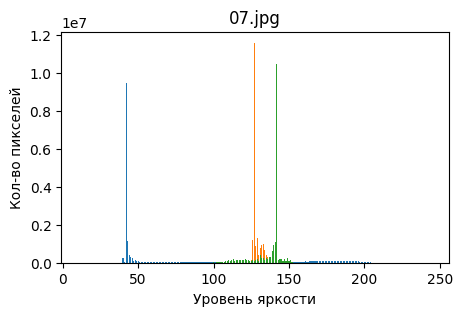

0-300


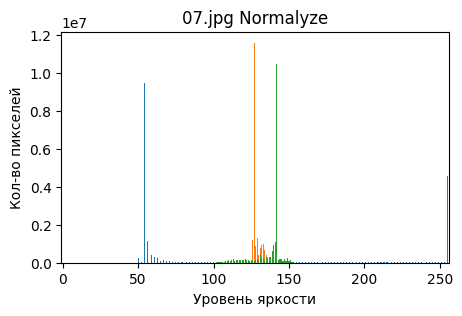

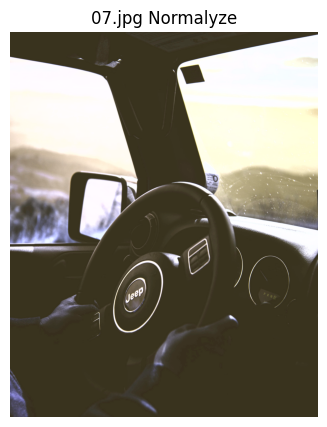

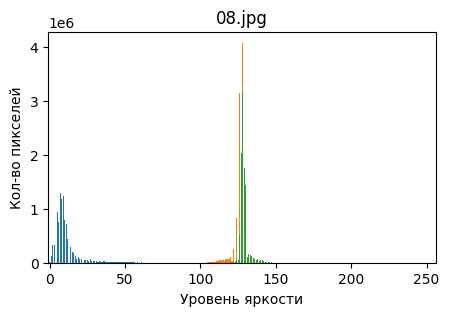

0-300


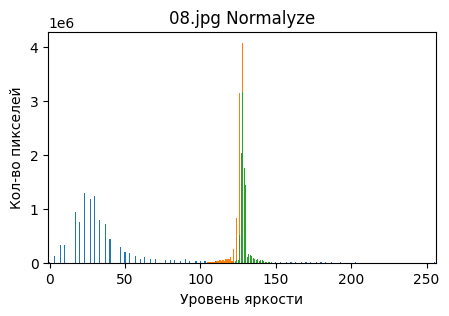

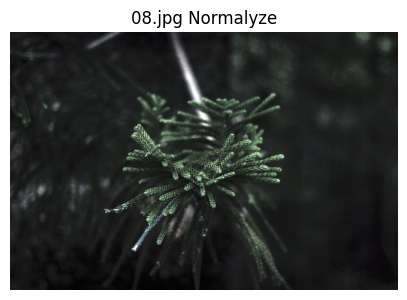

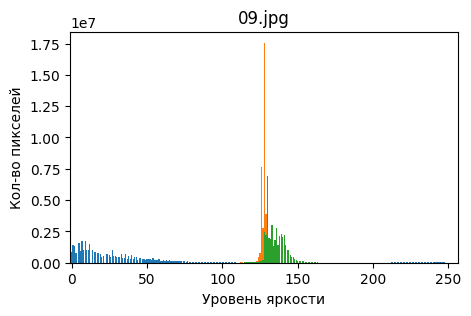

0-300


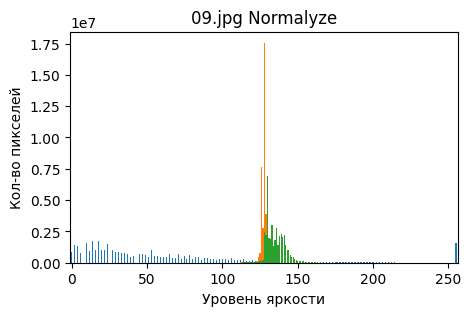

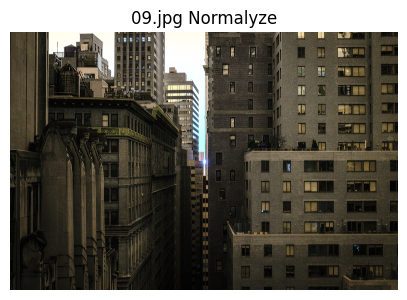

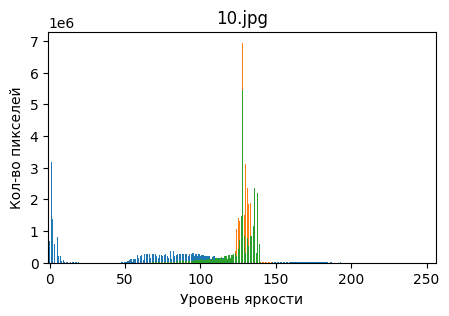

0-300


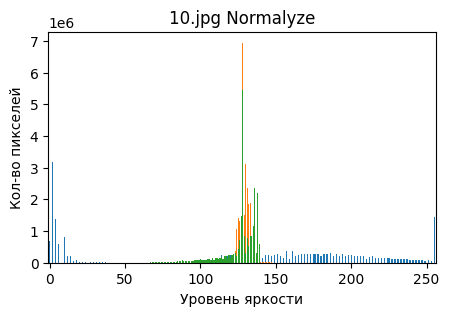

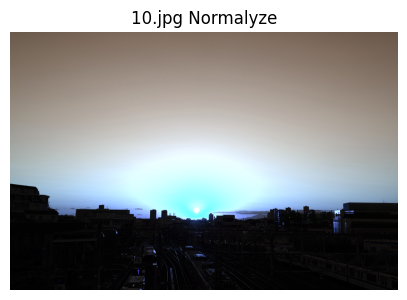

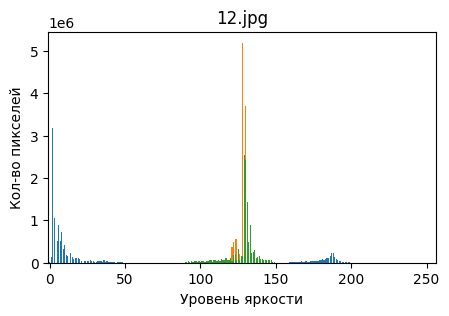

0-300


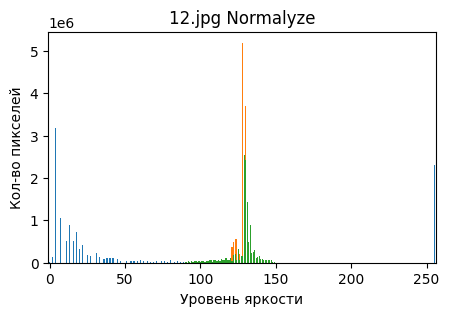

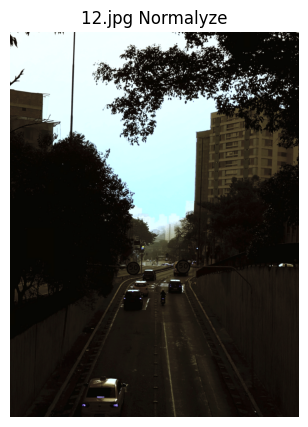

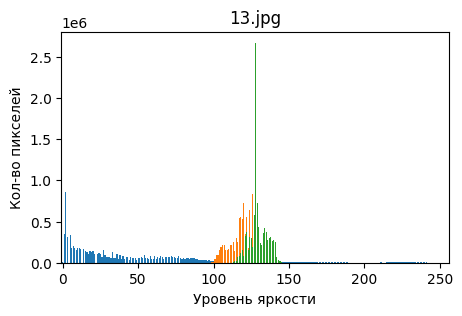

0-300


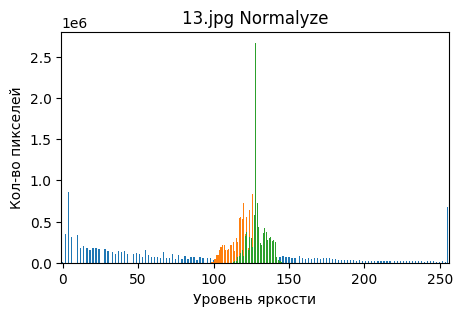

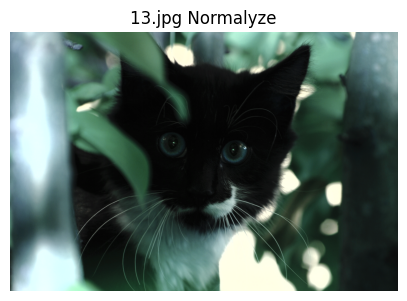

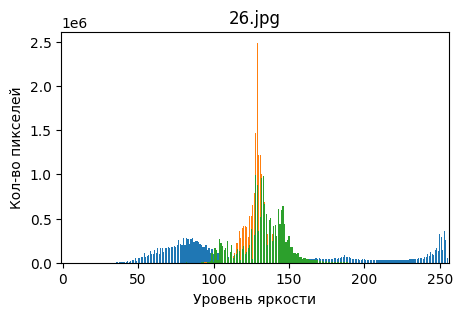

0-300


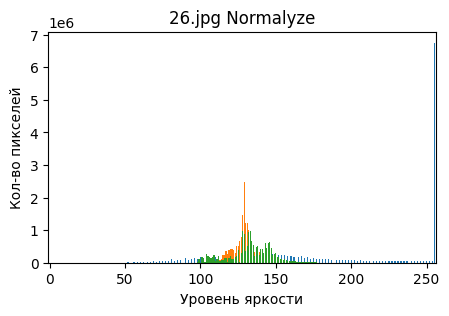

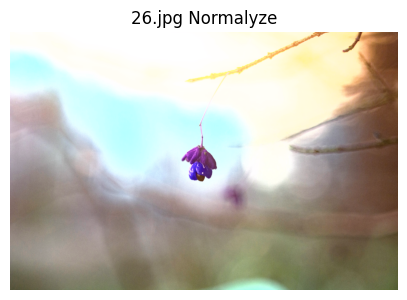

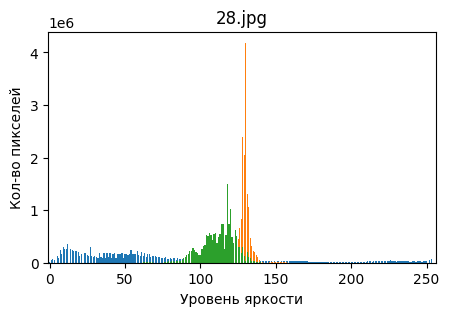

0-300


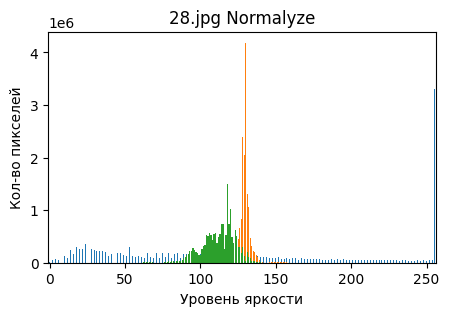

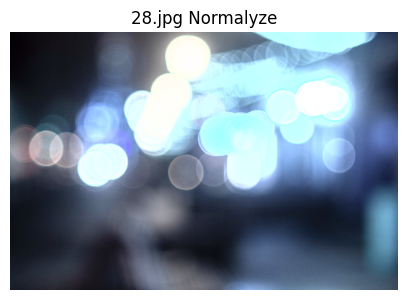

In [8]:
for path in os.listdir("images"):
    input = cv2.imread(os.path.join("images", path), cv2.IMREAD_COLOR)

    img = cv2.cvtColor(input, cv2.COLOR_RGB2Lab)
    print_chart(img, path)

    lightness = img[:,:,0]
    middle = int(np.median(cv2.cvtColor(input, cv2.COLOR_RGB2GRAY)))

    if(middle in range(130,255)):
        lightness = cv2.normalize(lightness, None, -150, 255, norm_type=cv2.NORM_MINMAX)
        print("-100-255")

    elif(middle in range(100,130)):
        lightness=cv2.normalize(lightness, None, -50, 300, norm_type=cv2.NORM_MINMAX)
        print("-50-300")

    elif(middle in range(0,100)):
        lightness=cv2.normalize(lightness, None, 0, 500, norm_type=cv2.NORM_MINMAX)
        print("0-300")

    img_norm = img
    img_norm[:,:,0] = lightness
    print_chart(img_norm, path+" Normalyze")
    img_norm = cv2.cvtColor(img_norm, cv2.COLOR_Lab2RGB)

    print_image(img_norm, path+" Normalyze")

    # img_eq = cv2.cvtColor(input, cv2.COLOR_RGB2GRAY)
    # img_eq = cv2.equalizeHist(img_eq)
    # print_image(img_eq, path+" Equalyze")

    # img_log = log_p(input)
    # print_image(img_log, path+" Logarithm")

    # img_deg = deg(input)
    # print_image(img_deg, path+" deg")
